<a href="https://colab.research.google.com/github/leticiaschaves/leticiaschaves/blob/data-projects/LESSON_01_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
import random

seed = random.randint(0, 2000)
print(f"Usando Seed = {seed}")
random.seed(seed)

Usando Seed = 607


In [ ]:
iris = datasets.load_iris()
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
x = pd.DataFrame(data = iris['data'], columns = iris['feature_names'])
y = pd.DataFrame(data = iris['target'], columns = ['target'])

In [ ]:
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [ ]:
y['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y)
print("tamanhos:", len(x_train), len(x_test))

tamanhos: 112 38


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.33)
print("tamanhos:", len(x_train), len(x_test))

tamanhos: 100 50


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.33, shuffle=True, random_state=random.randint(0, 2000))
print("tamanhos:", len(x_train), len(x_test))

tamanhos: 100 50


In [ ]:
from sklearn.model_selection import KFold
k_folds = KFold(n_splits = 4, shuffle = True, random_state = random.randint(0, 2000))

In [ ]:
for train_index, val_index in k_folds.split(x):
  x_train, x_test = x.iloc[train_index, :], x.iloc[val_index, :]
  y_train, y_test = y.iloc[train_index], y.iloc[val_index]

In [ ]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=4, shuffle=True)

In [ ]:
digitos = datasets.load_digits()
x = pd.DataFrame(data = digitos['data'], columns = digitos['feature_names'])
y = pd.DataFrame(data = digitos['target'], columns = ['target'])

x_train, x_test, y_train, y_test = train_test_split(x, y)
print("Quantidade de exemplos:", digitos['data'].shape[0])
print("Quantidade de caracteristicas: ", digitos['data'].shape[1])

Quantidade de exemplos: 1797
Quantidade de caracteristicas:  64


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
modelo = KNeighborsClassifier(n_neighbors=3)
modelo.fit(x_train, y_train.values.ravel())

val_preds = modelo.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, plot_confusion_matrix
base_accuracy = accuracy_score(y_test, val_preds)
base_f1_score = f1_score(y_test, val_preds, average='weighted')
print('Resultados da separação básica')
print("acurácia", base_accuracy)
print("F1 Score", base_f1_score)

Resultados da separação básica
acurácia 0.9888888888888889
F1 Score 0.9888791746868043


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


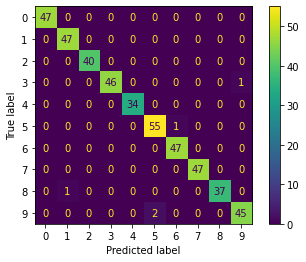

In [ ]:
plot_confusion_matrix(modelo, x_test, y_test)

In [ ]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True)

In [ ]:
skfold_accuracys=[]
skfold_f1_scores=[]

for train_index, val_index in skf.split(x, y):
  x_train = x.iloc[train_index, :]
  x_test = x.iloc[val_index, :]
  y_train = y.iloc[train_index]
  y_test = y.iloc[val_index]
  modelo_skfold = KNeighborsClassifier(n_neighbors=3)
  modelo_skfold.fit(x_train, y_train.values.ravel())
  val_preds = modelo_skfold.predict(x_test)
  skfold_accuracy = accuracy_score(y_test, val_preds)
  skfold_f1_score = f1_score(y_test, val_preds, average='weighted')
  skfold_accuracys.append(skfold_accuracy)
  skfold_f1_scores.append(skfold_f1_score)

In [ ]:
skfold_accuracys

[0.9888888888888889,
 0.9944444444444445,
 0.9888579387186629,
 0.9832869080779945,
 0.9860724233983287]

In [ ]:
skfold_accuracys = np.array(skfold_accuracys)

skfold_accuracy = skfold_accuracys.mean()
skfold_accuracy_std = skfold_accuracy.std()
skfold_accuracy, skfold_accuracy_std

(0.988310120705664, 0.0)

In [ ]:
skfold_f1_scores = np.array(skfold_f1_scores)

skfold_f1_score = skfold_f1_scores.mean()
skfold_f1_score_std = skfold_f1_scores.std()

skfold_f1_score, skfold_accuracy_std

(0.9882963924396547, 0.0)